<a href="https://colab.research.google.com/github/weisses1/swcolabfiles/blob/main/ts_clean_Weisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
timeseries1 = r'/content/final_timeseries_1.csv'
ts1 = pd.read_csv(timeseries1, parse_dates= ['date']).set_index("date").sort_index()
ts1

,demand
date,
2022-01-01,NaN
2022-01-02,102.0
2022-01-03,113.0
2022-01-04,125.0
2022-01-05,111.0
...,...
2023-12-27,498.0
2023-12-28,498.0
2023-12-29,499.0


In [8]:
timeseries2 = r'/content/final_timeseries_2.csv'
ts2 = pd.read_csv(timeseries2, parse_dates= ['date']).set_index("date").sort_index()
ts2

,demand
date,
2022-01-01,104.0
2022-01-02,145.0
2022-01-03,138.0
2022-01-04,105.0
2022-01-05,109.0
...,...
2023-12-27,516.0
2023-12-28,468.0
2023-12-29,486.0


In [9]:
ts1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 690 entries, 2022-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  660 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


In [10]:
ts_min = ts1.index.min()
ts_max = ts1.index.max()

In [11]:
ts_max

Timestamp('2023-12-31 00:00:00')

In [12]:
ts_min

Timestamp('2022-01-01 00:00:00')

In [13]:
full_range = pd.date_range(ts_min,ts_max)

In [14]:
missing_dates_ts1 = full_range.difference(ts1.index)

In [15]:
ts2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 690 entries, 2022-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  660 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


In [16]:
missing_dates_ts2 = full_range.difference(ts2.index)

In [17]:
missing_dates_ts1

DatetimeIndex(['2022-01-19', '2022-01-30', '2022-02-21', '2022-03-04',
               '2022-03-09', '2022-03-12', '2022-03-24', '2022-04-19',
               '2022-04-28', '2022-05-18', '2022-06-26', '2022-08-20',
               '2022-09-04', '2022-09-21', '2022-12-04', '2023-01-20',
               '2023-01-27', '2023-02-15', '2023-02-25', '2023-03-01',
               '2023-03-12', '2023-03-17', '2023-04-05', '2023-04-25',
               '2023-05-10', '2023-05-20', '2023-06-14', '2023-06-18',
               '2023-07-07', '2023-07-15', '2023-07-26', '2023-07-28',
               '2023-08-04', '2023-08-07', '2023-09-24', '2023-10-04',
               '2023-10-13', '2023-10-16', '2023-11-13', '2023-12-25'],
              dtype='datetime64[ns]', freq=None)

In [18]:
print('Missing in ts1:',len(missing_dates_ts1))

Missing in ts1: 40


In [19]:
missing_dates_ts2

DatetimeIndex(['2022-02-27', '2022-05-16', '2022-06-13', '2022-06-27',
               '2022-07-01', '2022-07-20', '2022-08-10', '2022-08-18',
               '2022-08-28', '2022-10-06', '2022-10-08', '2022-10-09',
               '2022-10-16', '2022-11-01', '2022-11-28', '2022-12-24',
               '2022-12-27', '2023-01-02', '2023-01-06', '2023-01-25',
               '2023-02-06', '2023-03-25', '2023-03-27', '2023-03-28',
               '2023-04-21', '2023-05-11', '2023-05-14', '2023-05-16',
               '2023-06-07', '2023-06-22', '2023-07-01', '2023-07-18',
               '2023-07-19', '2023-08-05', '2023-09-09', '2023-09-11',
               '2023-10-31', '2023-11-11', '2023-11-15', '2023-11-19'],
              dtype='datetime64[ns]', freq=None)

In [20]:
print('Missing in ts2:',len(missing_dates_ts2))

Missing in ts2: 40


In [21]:
na_ts1 = ts1.isna().sum().sum()
print('Missing NA values in ts1:',na_ts1)

Missing NA values in ts1: 30


In [22]:
na_ts2 = ts2.isna().sum().sum()
print('Missing NA values in ts2:',na_ts2)

Missing NA values in ts2: 30


In [23]:
ts1_reindex = ts1.reindex(full_range)
ts1_reindex

,demand
2022-01-01,NaN
2022-01-02,102.0
2022-01-03,113.0
2022-01-04,125.0
2022-01-05,111.0
...,...
2023-12-27,498.0
2023-12-28,498.0
2023-12-29,499.0
2023-12-30,488.0


In [24]:
missing_reindex_ts1 = ts1_reindex.isna().sum().sum()
print('Missing NA values in ts1 after reindex:',missing_reindex_ts1)

Missing NA values in ts1 after reindex: 70


In [25]:
ts2_reindex = ts2.reindex(full_range)
ts2_reindex

,demand
2022-01-01,104.0
2022-01-02,145.0
2022-01-03,138.0
2022-01-04,105.0
2022-01-05,109.0
...,...
2023-12-27,516.0
2023-12-28,468.0
2023-12-29,486.0
2023-12-30,521.0


In [26]:
missing_reindex_ts2 = ts2_reindex.isna().sum().sum()
print('Missing NA values in ts2 after reindex:',missing_reindex_ts2)

Missing NA values in ts2 after reindex: 70


In [27]:
# Fill missing values with time interpolation and forward/back fill for edges
ts1_filled = ts1_reindex.copy()
ts1_filled['demand'] = ts1_filled['demand'].interpolate(method='time')
ts1_filled['demand'] = ts1_filled['demand'].ffill().bfill()
missing_after_ts1 = ts1_filled.isna().sum().sum()
print('Missing NA values in ts1 after interpolation and fill:', missing_after_ts1)

ts2_filled = ts2_reindex.copy()
ts2_filled['demand'] = ts2_filled['demand'].interpolate(method='time')
ts2_filled['demand'] = ts2_filled['demand'].ffill().bfill()
missing_after_ts2 = ts2_filled.isna().sum().sum()
print('Missing NA values in ts2 after interpolation and fill:', missing_after_ts2)

Missing NA values in ts1 after interpolation and fill: 0
Missing NA values in ts2 after interpolation and fill: 0


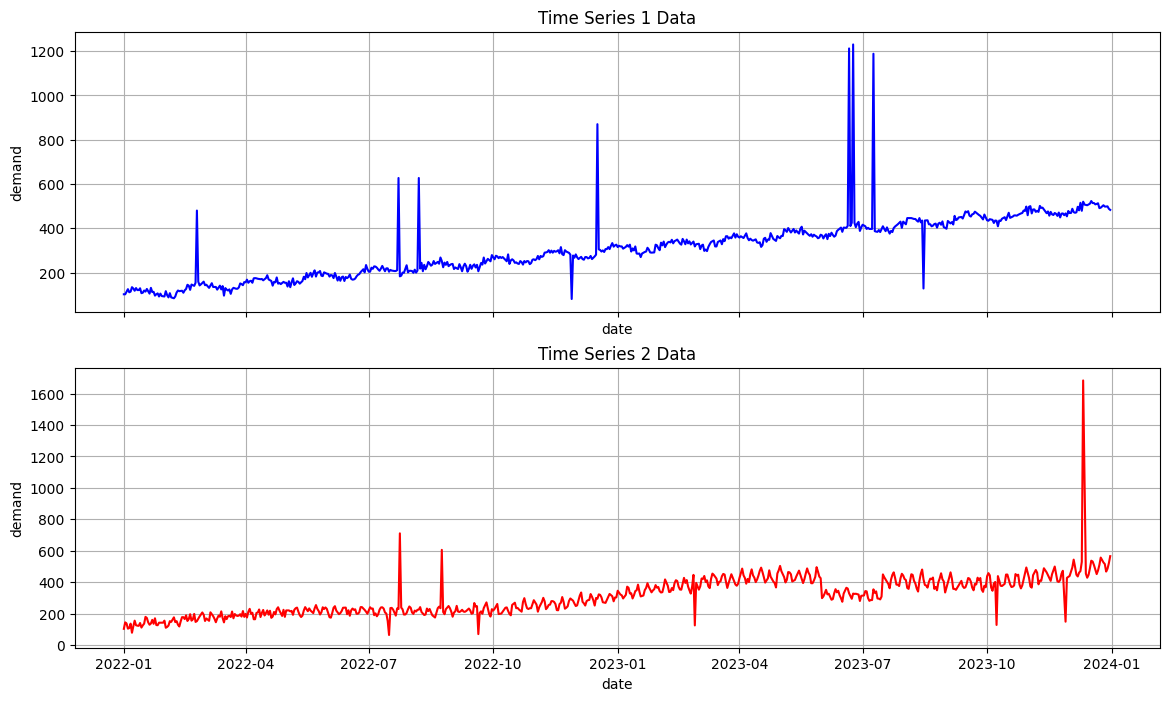

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), sharex=True)

axes[0].plot(ts1_filled.index, ts1_filled['demand'], color='blue')
axes[0].set_title('Time Series 1 Data')
axes[0].set_xlabel('date')
axes[0].set_ylabel('demand')
axes[0].grid(True)

axes[1].plot(ts2_filled.index, ts2_filled['demand'], color='red')
axes[1].set_title('Time Series 2 Data')
axes[1].set_xlabel('date')
axes[1].set_ylabel('demand')
axes[1].grid(True)

plt.show();

In [29]:
# Detect outliers using three methods: global z-score, rolling z-score, and IQR
import numpy as np
# Parameters
global_z_threshold = 3.0
rolling_window = 7  # days
rolling_z_threshold = 3.0
iqr_multiplier = 1.5

def detect_outliers(df, col='demand'):
    s = df[col].astype(float)
    # Global z-score
    mean = s.mean()
    std = s.std()
    global_z = (s - mean) / std
    global_flag = global_z.abs() > global_z_threshold

    # Rolling z-score
    roll_mean = s.rolling(rolling_window, center=True, min_periods=1).mean()
    roll_std = s.rolling(rolling_window, center=True, min_periods=1).std()
    rolling_z = (s - roll_mean) / roll_std.replace(0, np.nan)
    rolling_flag = rolling_z.abs() > rolling_z_threshold

    # IQR method
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_low = q1 - iqr_multiplier * iqr
    iqr_high = q3 + iqr_multiplier * iqr
    iqr_flag = (s < iqr_low) | (s > iqr_high)

    # Combine flags and create a summary
    flags = pd.DataFrame(index=df.index)
    flags['value'] = s
    flags['global_z'] = global_flag
    flags['rolling_z'] = rolling_flag.fillna(False)
    flags['iqr'] = iqr_flag
    flags['outlier'] = flags[['global_z', 'rolling_z', 'iqr']].any(axis=1)
    flags['outlier_by'] = flags.apply(lambda r: ','.join([k for k in ['global_z','rolling_z','iqr'] if r[k]]), axis=1)
    return flags

# Apply detection for ts1_filled and ts2_filled
out_ts1 = detect_outliers(ts1_filled)
out_ts2 = detect_outliers(ts2_filled)

print('ts1 outliers count:', out_ts1['outlier'].sum())
print('ts2 outliers count:', out_ts2['outlier'].sum())

# Show the top 10 largest outliers for each method (by absolute deviation)
out_ts1['abs_dev'] = (out_ts1['value'] - out_ts1['value'].median()).abs()
out_ts2['abs_dev'] = (out_ts2['value'] - out_ts2['value'].median()).abs()
print('\nTop 10 outliers in ts1:')
print(out_ts1[out_ts1['outlier']].sort_values('abs_dev', ascending=False).head(10))
print('\nTop 10 outliers in ts2:')
print(out_ts2[out_ts2['outlier']].sort_values('abs_dev', ascending=False).head(10))

ts1 outliers count: 4
ts2 outliers count: 3

Top 10 outliers in ts1:
             value  global_z  rolling_z   iqr  outlier    outlier_by  abs_dev
2023-06-24  1230.0      True      False  True     True  global_z,iqr    929.0
2023-06-21  1212.0      True      False  True     True  global_z,iqr    911.0
2023-07-09  1188.0      True      False  True     True  global_z,iqr    887.0
2022-12-17   870.0      True      False  True     True  global_z,iqr    569.0

Top 10 outliers in ts2:
             value  global_z  rolling_z   iqr  outlier    outlier_by  abs_dev
2023-12-11  1683.0      True      False  True     True  global_z,iqr   1383.5
2023-12-12  1069.0      True      False  True     True  global_z,iqr    769.5
2022-07-24   711.0      True      False  True     True  global_z,iqr    411.5


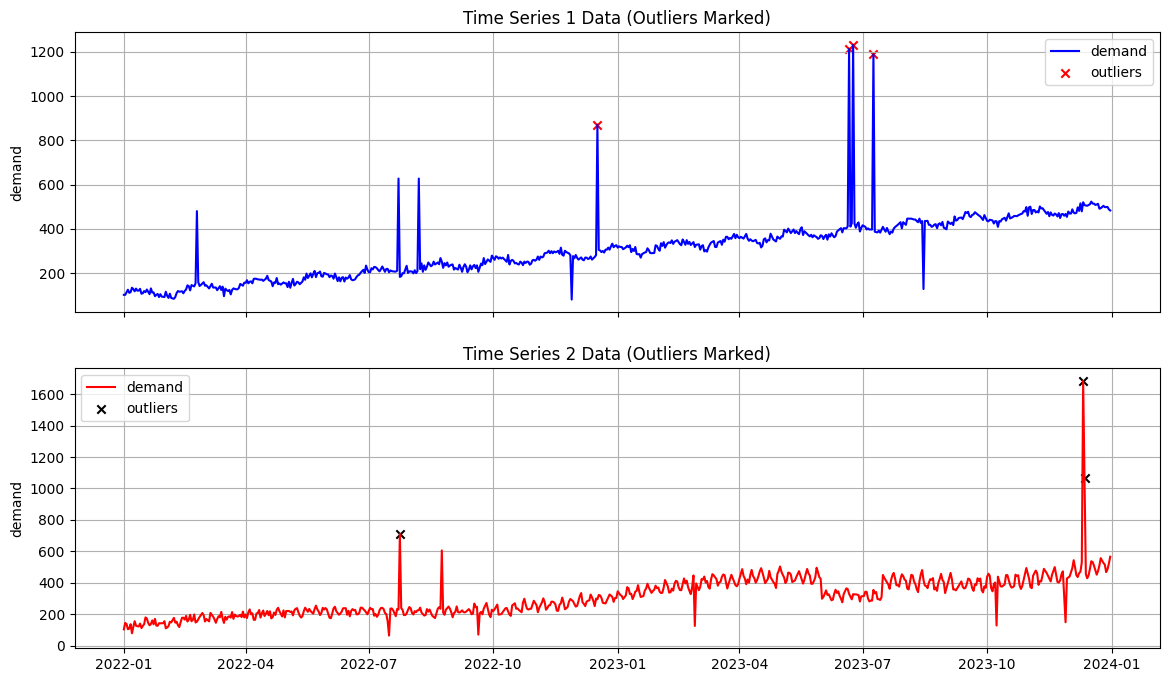

In [30]:
# Plot outliers on the filled series for quick inspection
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), sharex=True)

axes[0].plot(ts1_filled.index, ts1_filled['demand'], color='blue', label='demand')
# mark outliers red crosses
axes[0].scatter(out_ts1.index[out_ts1['outlier']], out_ts1['value'][out_ts1['outlier']], color='red', marker='x', label='outliers')
axes[0].set_title('Time Series 1 Data (Outliers Marked)')
axes[0].set_ylabel('demand')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(ts2_filled.index, ts2_filled['demand'], color='red', label='demand')
axes[1].scatter(out_ts2.index[out_ts2['outlier']], out_ts2['value'][out_ts2['outlier']], color='black', marker='x', label='outliers')
axes[1].set_title('Time Series 2 Data (Outliers Marked)')
axes[1].set_ylabel('demand')
axes[1].legend()
axes[1].grid(True)

plt.show()

In [31]:
# Replace outliers by setting them to NaN and interpolating, then apply rolling median smoothing
rolling_window_replace = 7
rolling_window_smooth = 11
# ts1: replace flagged outliers with NaN and interpolate
ts1_replaced = ts1_filled.copy()
ts1_replaced['demand'] = ts1_replaced['demand'].mask(out_ts1['outlier'])
ts1_replaced['demand'] = ts1_replaced['demand'].interpolate(method='time').ffill().bfill()
# smoothed via rolling median to reduce any harsh changes
ts1_smoothed = ts1_replaced.copy()
ts1_smoothed['demand'] = ts1_smoothed['demand'].rolling(rolling_window_smooth, center=True, min_periods=1).median()
# ts2: similar operations
ts2_replaced = ts2_filled.copy()
ts2_replaced['demand'] = ts2_replaced['demand'].mask(out_ts2['outlier'])
ts2_replaced['demand'] = ts2_replaced['demand'].interpolate(method='time').ffill().bfill()
ts2_smoothed = ts2_replaced.copy()
ts2_smoothed['demand'] = ts2_smoothed['demand'].rolling(rolling_window_smooth, center=True, min_periods=1).median()

# Summaries
print('ts1 outliers replaced:', out_ts1['outlier'].sum())
print('ts2 outliers replaced:', out_ts2['outlier'].sum())

# Optional: show sample of replacements
print('\nts1 sample replaced values:')
print(pd.concat([ts1_filled['demand'][out_ts1['outlier']], ts1_replaced['demand'][out_ts1['outlier']], ts1_smoothed['demand'][out_ts1['outlier']]], axis=1).head(10))
print('\nts2 sample replaced values:')
print(pd.concat([ts2_filled['demand'][out_ts2['outlier']], ts2_replaced['demand'][out_ts2['outlier']], ts2_smoothed['demand'][out_ts2['outlier']]], axis=1).head(10))

ts1 outliers replaced: 4
ts2 outliers replaced: 3

ts1 sample replaced values:
            demand  demand  demand
2022-12-17   870.0   293.0   293.0
2023-06-21  1212.0   410.5   410.0
2023-06-24  1230.0   424.5   411.0
2023-07-09  1188.0   392.0   392.0

ts2 sample replaced values:
            demand  demand  demand
2022-07-24   711.0   234.5   226.0
2023-12-11  1683.0   505.0   461.0
2023-12-12  1069.0   480.0   471.0


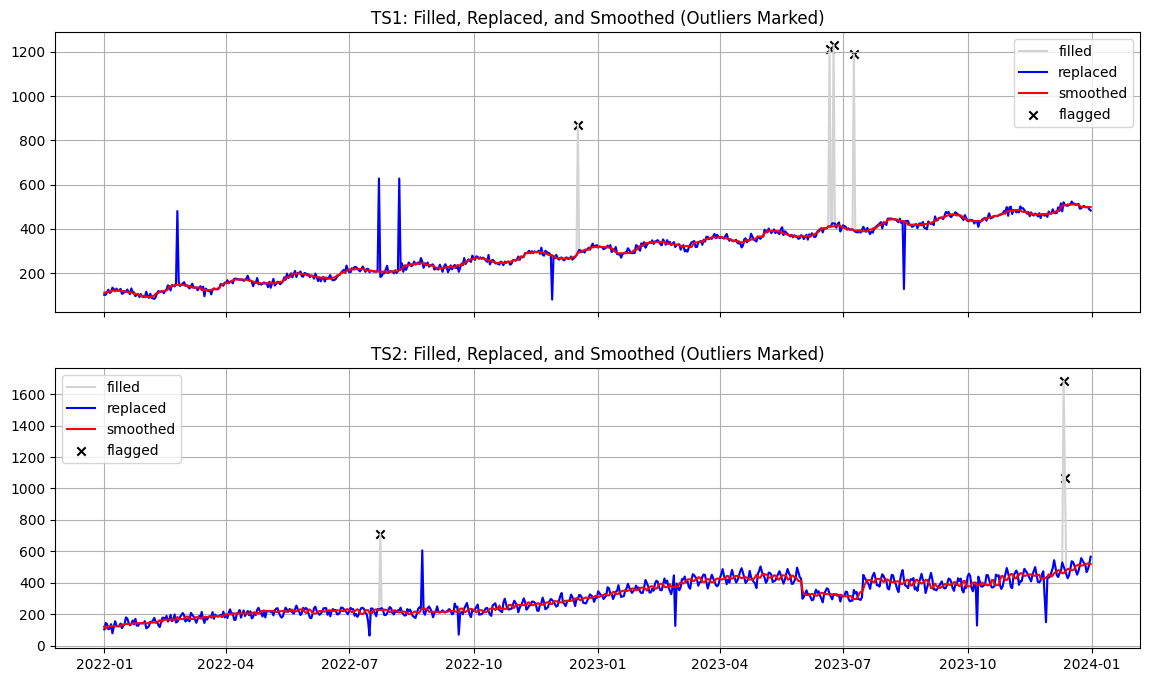

In [32]:
# Plot comparison of filled, replaced and smoothed series for both time series
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), sharex=True)
# ts1 comparison
axes[0].plot(ts1_filled.index, ts1_filled['demand'], color='lightgray', label='filled')
axes[0].plot(ts1_replaced.index, ts1_replaced['demand'], color='blue', label='replaced')
axes[0].plot(ts1_smoothed.index, ts1_smoothed['demand'], color='red', label='smoothed')
axes[0].scatter(out_ts1.index[out_ts1['outlier']], ts1_filled['demand'][out_ts1['outlier']], color='black', marker='x', label='flagged')
axes[0].set_title('TS1: Filled, Replaced, and Smoothed (Outliers Marked)')
axes[0].legend()
axes[0].grid(True)
# ts2 comparison
axes[1].plot(ts2_filled.index, ts2_filled['demand'], color='lightgray', label='filled')
axes[1].plot(ts2_replaced.index, ts2_replaced['demand'], color='blue', label='replaced')
axes[1].plot(ts2_smoothed.index, ts2_smoothed['demand'], color='red', label='smoothed')
axes[1].scatter(out_ts2.index[out_ts2['outlier']], ts2_filled['demand'][out_ts2['outlier']], color='black', marker='x', label='flagged')
axes[1].set_title('TS2: Filled, Replaced, and Smoothed (Outliers Marked)')
axes[1].legend()
axes[1].grid(True)
plt.show()

In [34]:
ts1 = ts1_smoothed.reset_index().rename(columns={"index": "date"})
ts1.to_csv("ts1_clean.csv", index=False)

ts2 = ts2_smoothed.reset_index().rename(columns={"index": "date"})
ts2.to_csv("ts2_clean.csv", index=False)